#### Testing A/B campaigns based on clicks

In [3]:
import numpy as np
from scipy.stats import norm

# Given data
clicks_A, users_A = 220, 1000
clicks_B, users_B = 250, 1000

# Sample proportions
p_A = clicks_A / users_A
p_B = clicks_B / users_B

# Combined proportion
p_combined = (clicks_A + clicks_B) / (users_A + users_B)

# Standard error calculation
SE = np.sqrt(p_combined * (1 - p_combined) * (1/users_A + 1/users_B))

# Compute Z-score
z_score = (p_B - p_A) / SE

# Compute p-value (one-tailed test)
p_value = 1 - norm.cdf(z_score)

# Print Results
print(f"Z-Score: {z_score:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision
alpha = 0.05
if p_value < alpha:
    print("Reject H₀: Campaign B performs significantly better!")
else:
    print("Fail to reject H₀: No significant difference between A & B.")


Z-Score: 1.5821
P-Value: 0.0568
Fail to reject H₀: No significant difference between A & B.


#### Central Limit Theorem

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

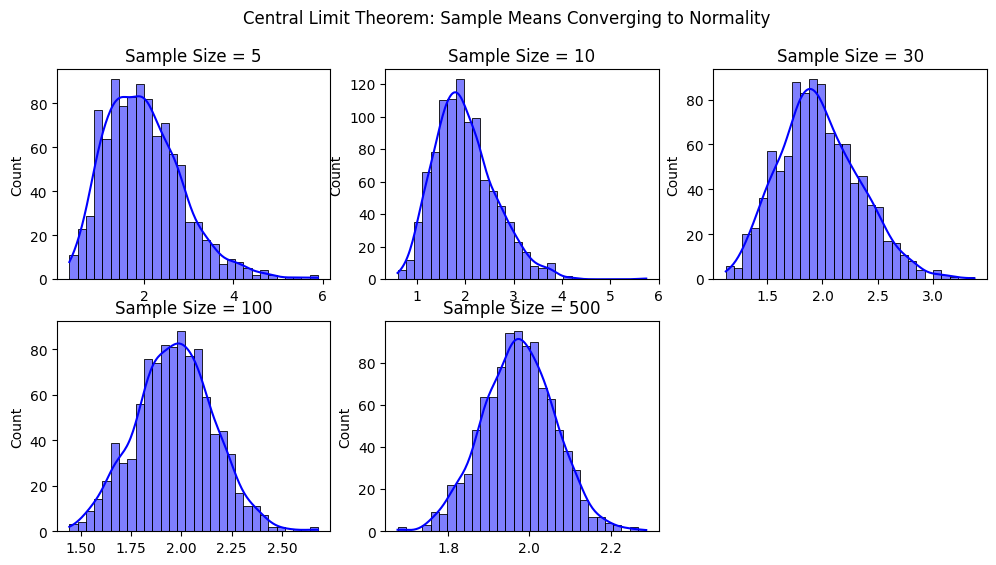

In [5]:
# Generate a non-normal population (Exponential Distribution)
population = np.random.exponential(scale=2, size=10000)

# Take different sample sizes and calculate means
sample_sizes = [5, 10, 30, 100, 500]
plt.figure(figsize=(12, 6))

for i, n in enumerate(sample_sizes):
    sample_means = [np.mean(np.random.choice(population, size = n)) for _ in range(1000)]
    plt.subplot(2,3,i + 1)
    sns.histplot(sample_means, kde = True, bins= 30, color = 'blue')
    plt.title(f"Sample Size = {n}")

plt.suptitle("Central Limit Theorem: Sample Means Converging to Normality")
plt.show()

#### Hypothesis Testing

In [6]:
# Z-test (large samples, n > 30)
from scipy.stats import norm

# Given Data
sample_mean = 13.5
population_mean = 15
std_dev = 4
n = 50
alpha = 0.05

# Compute Z-score
z_score = (sample_mean - population_mean) / (std_dev / np.sqrt(n))

# Compute p-value
p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Decision
if p_value < alpha:
    print(f"Reject H₀ (p-value = {p_value:.4f}) → Loan processing is faster!")
else:
    print(f"Fail to reject H₀ (p-value = {p_value:.4f}) → No significant difference.")


Reject H₀ (p-value = 0.0080) → Loan processing is faster!


In [7]:
# T- Test (small samples, n < 30)

from scipy.stats import ttest_1samp

# Sample Data (Weight Reduction in kg)
weight_loss = [2.1, 1.8, 2.4, 2.0, 1.5, 2.7, 1.9, 2.2, 1.8, 2.5]

# Perform T-Test (H₀: Mean weight loss = 2 kg)
t_stat, p_value = ttest_1samp(weight_loss, 2)

# Decision
if p_value < alpha:
    print(f"Reject H₀ (p-value = {p_value:.4f}) → Diet pill is effective!")
else:
    print(f"Fail to reject H₀ (p-value = {p_value:.4f}) → No significant effect.")


Fail to reject H₀ (p-value = 0.4574) → No significant effect.


In [8]:
# Chi-square Test (Categorical Data)

import scipy.stats as stats
import numpy as np

# Observed Frequency Table
observed = np.array([[50, 30], [20, 40]])  # [Male, Female]

# Perform Chi-Square Test
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

# Decision
if p_value < alpha:
    print(f"Reject H₀ (p-value = {p_value:.4f}) → Gender influences purchase!")
else:
    print(f"Fail to reject H₀ (p-value = {p_value:.4f}) → No significant relationship.")


Reject H₀ (p-value = 0.0012) → Gender influences purchase!
